In [3]:
import numpy as np
import pandas as pd
import underthesea
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from IPython.display import display
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Tải dữ liệu lên

In [4]:
df1 =pd.read_excel(r"C:\Users\DELL\Downloads\Bo_luat_Doanh_Nghiep_final.xlsx")
df2 =pd.read_excel(r"C:\Users\DELL\Downloads\Bo_luat_Lao_Dong_final.xlsx")
df3 =pd.read_excel(r"C:\Users\DELL\Downloads\Bo_luat_Dan_su_final.xlsx")
df4 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_An_ninh_mang_final.xlsx")
df5 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_Dat_dai_final.xlsx")
df6 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_Hon_nhan_va_gia_dinh_final.xlsx")
df7 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_To_tung_dan_su_final.xlsx")

Chuẩn bị dữ liệu

In [5]:
df=pd.merge(df1, df2, how="outer").merge(df3, how="outer").merge(df4, how="outer").merge(df5, how="outer").merge(df6, how="outer").merge(df7, how="outer")

In [6]:
df

,Điều,Nội dung,Bộ luật
0,Điều 1. Phạm vi điều chỉnh,Bộ luật Lao động quy định tiêu chuẩn lao động;...,Lao Động
1,Điều 1. Phạm vi điều chỉnh,"Bộ luật này quy định địa vị pháp lý, chuẩn mực...",Dân sự
2,Điều 1. Phạm vi điều chỉnh,Luật này quy định chế độ hôn nhân và gia đình;...,Hôn nhân và gia đình
3,Điều 1. Phạm vi điều chỉnh,"Luật này quy định về chế độ sở hữu đất đai, qu...",Đất đai
4,Điều 1. Phạm vi điều chỉnh,Luật này quy định về hoạt động bảo vệ an ninh ...,An ninh mạng
...,...,...,...
2075,Điều 99. Chủ tịch công ty,1. Chủ tịch công ty do cơ quan đại diện chủ sở...,Doanh Nghiệp
2076,Điều 99. Giải quyết tranh chấp liên quan đến v...,1. Tòa án là cơ quan có thẩm quyền giải quyết ...,Hôn nhân và gia đình
2077,Điều 99. Lấy lời khai của người làm chứng,1. Theo yêu cầu của đương sự hoặc khi xét thấy...,Tố tụng dân sự
2078,Điều 99. Tiền lương ngừng việc,"Trường hợp phải ngừng việc, người lao động đượ...",Lao Động


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Điều      2080 non-null   object
 1   Nội dung  2080 non-null   object
 2   Bộ luật   2080 non-null   object
dtypes: object(3)
memory usage: 48.9+ KB


-----------------------------------------

**TIỀN XỬ LÝ DỮ LIỆU**

----------------------------------------

**CHỈNH DẠNG DỮ LIỆU**

Tạo hàm để kiểm tra nội dung có hợp lệ hay không (Viết hoa và chữ viết có chứa số hay không)

In [8]:
def containDigit(iword):
    return any(ch.isdigit() for ch in iword)

def containUpperLetterButNotFirst(iword):
    if(iword.isupper()):
        return True
    for i in range(1, len(iword)):
        if(iword[i].isupper() and iword[i-1]!=' '):
            return False
    return True

def FeatureFunction1(w): # Chỉ lọc những từ không hợp lệ có độ dài từ 3 kí tự trở xuống VÀ có chứa số VÀ có chữ cái viết hoa không chuẩn (viết hoa không phải kí tự đầu)
    return len(w) > 3 and not containDigit(w) and containUpperLetterButNotFirst(w)

In [9]:
for i in range(len(df["Điều"])):
  lwt = underthesea.word_tokenize(df["Điều"].iloc[i].replace("'","").replace("\"",""))
  lwtl = [w for w in lwt if FeatureFunction1(w)]
  df.loc[i, "Điều"] = " | ".join(lwtl)

In [10]:
for i in range(len(df["Nội dung"])):
  lwc = underthesea.word_tokenize(df["Nội dung"].iloc[i].replace("'","").replace("\"",""))
  lwcl = [w for w in lwc if FeatureFunction1(w)]
  df.loc[i, "Nội dung"] = " | ".join(lwcl)

In [11]:
display(df)

,Điều,Nội dung,Bộ luật
0,Điều | Phạm vi | điều chỉnh,Bộ luật Lao động | quy định | tiêu chuẩn | lao...,Lao Động
1,Điều | Phạm vi | điều chỉnh,Bộ luật | quy định | địa vị | pháp lý | chuẩn ...,Dân sự
2,Điều | Phạm vi | điều chỉnh,Luật | quy định | chế độ | hôn nhân | gia đình...,Hôn nhân và gia đình
3,Điều | Phạm vi | điều chỉnh,Luật | quy định | chế độ sở hữu | đất đai | qu...,Đất đai
4,Điều | Phạm vi | điều chỉnh,Luật | quy định | hoạt động | bảo vệ | an ninh...,An ninh mạng
...,...,...,...
2075,Điều | Chủ tịch | công ty,Chủ tịch | công ty | cơ quan | đại diện | chủ ...,Doanh Nghiệp
2076,Điều | Giải quyết | tranh chấp | liên quan | v...,Tòa án | cơ quan | thẩm quyền | giải quyết | t...,Hôn nhân và gia đình
2077,Điều | khai | người | làm chứng,Theo | yêu cầu | đương sự | hoặc | thấy | cần ...,Tố tụng dân sự
2078,Điều | Tiền lương | ngừng | việc,Trường hợp | phải | ngừng | việc | người | lao...,Lao Động


In [12]:
for i in range(len(df["Nội dung"])):
  df.loc[i, "text"] = str(df["Nội dung"][i] + " | " + df['Điều'][i])

combined_df=df.drop(labels=["Điều", "Nội dung"], axis=1)

In [13]:
display(combined_df)

,Bộ luật,text
0,Lao Động,Bộ luật Lao động | quy định | tiêu chuẩn | lao...
1,Dân sự,Bộ luật | quy định | địa vị | pháp lý | chuẩn ...
2,Hôn nhân và gia đình,Luật | quy định | chế độ | hôn nhân | gia đình...
3,Đất đai,Luật | quy định | chế độ sở hữu | đất đai | qu...
4,An ninh mạng,Luật | quy định | hoạt động | bảo vệ | an ninh...
...,...,...
2075,Doanh Nghiệp,Chủ tịch | công ty | cơ quan | đại diện | chủ ...
2076,Hôn nhân và gia đình,Tòa án | cơ quan | thẩm quyền | giải quyết | t...
2077,Tố tụng dân sự,Theo | yêu cầu | đương sự | hoặc | thấy | cần ...
2078,Lao Động,Trường hợp | phải | ngừng | việc | người | lao...


**EDA**

In [ ]:
# Lấy danh sách các bộ luật
laws = df['Bộ luật'].unique()

# Vòng lặp qua từng bộ luật để tạo Word Cloud
for law in laws:
    # Lấy tất cả văn bản thuộc bộ luật này
    texts = df[df['Bộ luật'] == law]['text']
    
    # Gộp tất cả từ thành một chuỗi duy nhất, các từ cách nhau bằng khoảng trắng
    combined_text = " ".join(" ".join(text.split(" | ")) for text in texts)
    
    # Tạo Word Cloud
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(combined_text)
    
    # Vẽ Word Cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud của Bộ luật: {law}", fontsize=16)
    plt.show()


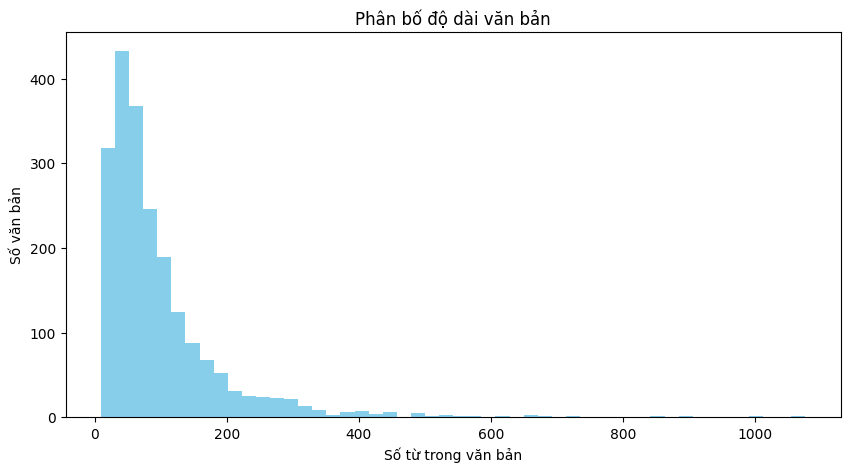

In [251]:
import matplotlib.pyplot as plt

df['word_count'] = df['text'].apply(lambda x: len(x.split(" | ")))

# Histogram
plt.figure(figsize=(10,5))
plt.hist(df['word_count'], bins=50, color='skyblue')
plt.xlabel('Số từ trong văn bản')
plt.ylabel('Số văn bản')
plt.title('Phân bố độ dài văn bản')
plt.show()

Đếm xem có bao nhiêu điều trong từng bộ luật

C:\Users\DELL\AppData\Local\Temp\ipykernel_12696\1331068878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count_per_law.index, y=count_per_law.values, palette='viridis')


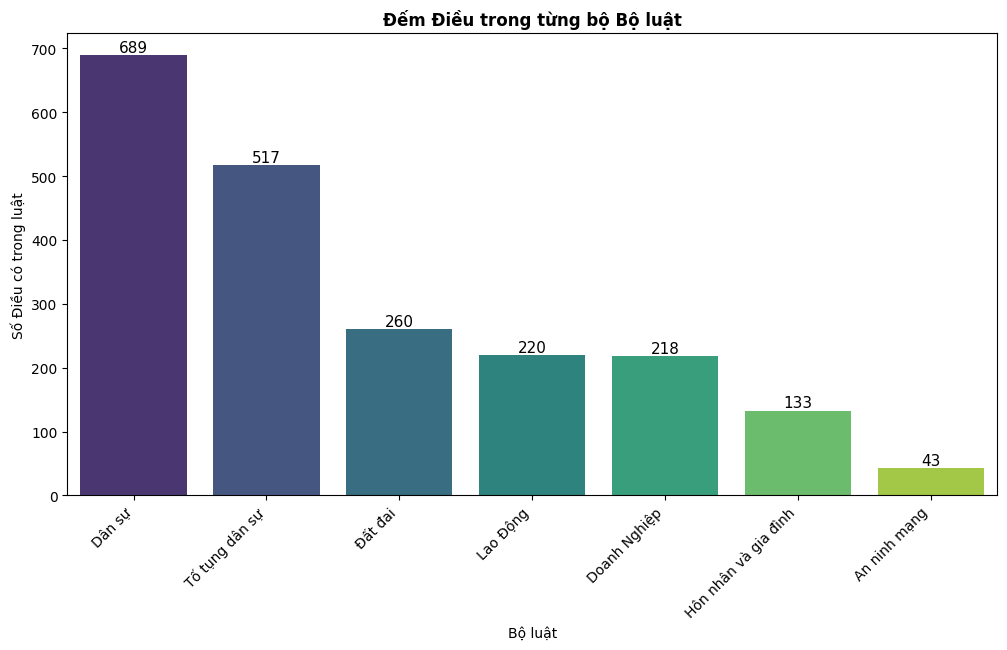

In [ ]:
count_per_law = df['Bộ luật'].value_counts()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=count_per_law.index, y=count_per_law.values, palette='viridis')

# Hiển thị số lượng trên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Số Điều có trong luật')
plt.title('Đếm Điều trong từng bộ Bộ luật', fontweight = 'bold')
plt.show()

20 Từ phổ biến nhất

C:\Users\DELL\AppData\Local\Temp\ipykernel_12696\2165086682.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette='magma')


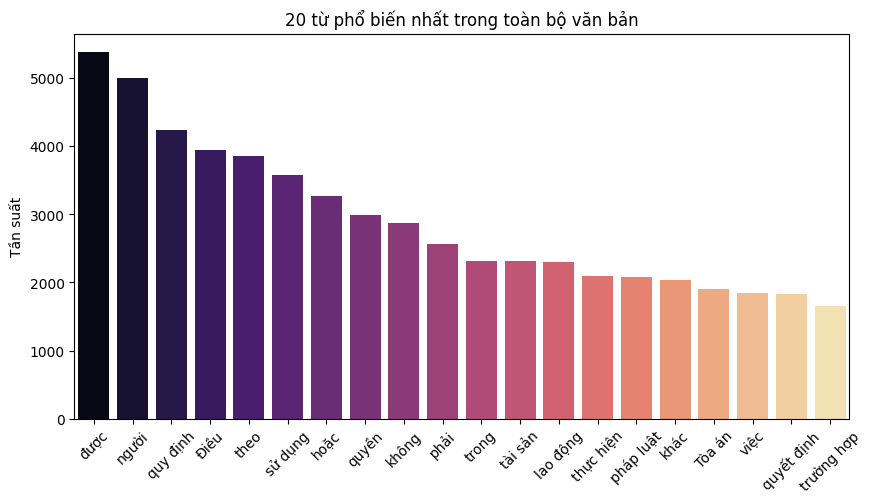

In [ ]:
all_words = [w for text in df['text'] for w in text.split(" | ")]
word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

plt.figure(figsize=(10,5))
sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette='magma')
plt.xticks(rotation=45)
plt.ylabel('Tần suất')
plt.title('20 từ phổ biến nhất trong toàn bộ văn bản')
plt.show()


------------------------------

**Xây dựng mô hình Machine Learning**

------------------------------------

**Chuẩn bị**

Chuẩn bị hai hàm TrainModel, giúp hiển thị thông số đánh giá mô hình và predict_code_pipeline giúp dự báo bộ luật

In [14]:
def TrainModel(model, _X_train, _X_test, _y_train, _y_test):
    model.fit(_X_train, _y_train)

    y_pred = model.predict(_X_test)

    acc = accuracy_score(_y_test, y_pred)
    prec = precision_score(_y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(_y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(_y_test, y_pred, average='macro', zero_division=0)
    print(f"Model {model} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    return model

In [16]:
def predict_code_pipeline(s, pipe):
    w_vi = " | ".join(underthesea.word_tokenize(s)).replace(" ", "_").replace("_|_", " ")  # Thay đổi biểu diễn chuỗi "Bầu trời | trong xanh" thành "Bầu_trời trong_xanh"
    result = pipe.predict([w_vi])
    return {s: result[0]}

Chuẩn bị câu để kiểm tra

In [17]:
input_list = ["Bất kỳ cá nhân hay tổ chức nào có hành vi góp vốn hoặc đứng tên thành lập doanh nghiệp đều giữ vai trò là người thành lập doanh nghiệp.",
              "Ngoại trừ các vụ án áp dụng thủ tục rút gọn, việc xét xử dân sự phải được thực hiện bởi một hội đồng (tập thể) và quyết định dựa trên ý kiến của đa số thành viên.",
              "Dù là người chủ hiện tại hay người tiếp quản sau này, họ đều phải có trách nhiệm thi hành phương án sử dụng lao động đã có hiệu lực."]

Chúng ta sẽ mong kết quả dự báo sẽ là doanh nghiệp, tố tụng dân sự và lao động

Sử dụng tfidf (TfidfVectorizer của scikit) vì chúng ta tập trung hơn vào một số từ đặc trưng hơn cho từng điều luật hoặc bộ luật. 

**Bước 1: Chuẩn hóa dữ liệu văn bản**

In [18]:
corpus = combined_df['text'].astype(str).tolist()
corpus_norm = [w.replace(" ", "_").replace("_|_", " ") for w in corpus]
y_cv = combined_df['Bộ luật']

**Bước 2: Chuẩn bị Training và Test Set**

In [19]:
X_train_text, X_test_text, y_train_cv, y_test_cv = train_test_split(
    corpus_norm, y_cv, test_size=0.3, random_state=42
)

**Bước 3: Vector hóa bằng TF-IDF và Trực quan hóa ma trận**

In [20]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X_train_text)
feature_names = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf.todense(), columns=feature_names)
df_tfidf.index = range(1, len(df_tfidf)+1)
print(df_tfidf.head())

   a_khoản  aids  an_dưỡng  an_ninh  an_ninh_mạng  an_sinh  an_toàn  anh_cả  \
1      0.0   0.0       0.0      0.0           0.0      0.0      0.0     0.0   
2      0.0   0.0       0.0      0.0           0.0      0.0      0.0     0.0   
3      0.0   0.0       0.0      0.0           0.0      0.0      0.0     0.0   
4      0.0   0.0       0.0      0.0           0.0      0.0      0.0     0.0   
5      0.0   0.0       0.0      0.0           0.0      0.0      0.0     0.0   

   anh_hùng  ba_mươi  ...  ổn_định  ủy_ban  ủy_ban_nhân_dân  ủy_nhiệm  \
1       0.0      0.0  ...      0.0     0.0         0.000000       0.0   
2       0.0      0.0  ...      0.0     0.0         0.000000       0.0   
3       0.0      0.0  ...      0.0     0.0         0.000000       0.0   
4       0.0      0.0  ...      0.0     0.0         0.000000       0.0   
5       0.0      0.0  ...      0.0     0.0         0.030826       0.0   

   ủy_quyền  ủy_thác  ứng_cử_viên  ứng_dụng  ứng_phó  ứng_xử  
1       0.0      0.0   

**Bước 4: Tạo pipeline cho mô hình Machine Learning**

In [21]:
tfidf_logistic = make_pipeline(
    TfidfVectorizer(
        ngram_range=(1, 2),
        min_df=3,
        max_df=0.9,
        sublinear_tf=True
    ),
    LogisticRegression(
        C=2.0,
        solver='saga',
        max_iter=3000,
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    )
)

tfidf_svm = make_pipeline(
    TfidfVectorizer(
        ngram_range=(1, 2),
        min_df=3,
        max_df=0.9
    ),
    LinearSVC(
        C=1.0,
        class_weight='balanced',
        max_iter=3000,
        random_state=42
    )
)

tfidf_nb = make_pipeline(
    TfidfVectorizer(
        ngram_range=(1, 2),
        min_df=5,max_df=0.8
    ),
    MultinomialNB(
        alpha=0.5
    )
)


**Bước 5: Huấn luyện mô hình**

In [22]:
tfidf_logistic.fit(X_train_text, y_train_cv)
tfidf_svm.fit(X_train_text, y_train_cv)
tfidf_nb.fit(X_train_text, y_train_cv)

# Hiển thị diagram
set_config(display='diagram')

# Hiển thị từng pipeline riêng biệt
display(tfidf_logistic)
display(tfidf_svm)
display(tfidf_nb)

,steps,"[('tfidfvectorizer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


,steps,"[('tfidfvectorizer', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


,steps,"[('tfidfvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [23]:
def eval_pipeline(pipe, X_test, y_test):
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    print(f"Model {pipe.steps[-1][1].__class__.__name__} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

eval_pipeline(tfidf_logistic, X_test_text, y_test_cv)
eval_pipeline(tfidf_svm, X_test_text, y_test_cv)
eval_pipeline(tfidf_nb, X_test_text, y_test_cv)

Model LogisticRegression - Accuracy: 0.9663, Precision: 0.9590, Recall: 0.9759, F1: 0.9670
Model LinearSVC - Accuracy: 0.9631, Precision: 0.9577, Recall: 0.9688, F1: 0.9629
Model MultinomialNB - Accuracy: 0.9423, Precision: 0.9611, Recall: 0.9076, F1: 0.9220


**Kiểm tra thử mô hình**

In [24]:
for s in input_list:
    print("Logistic: ", predict_code_pipeline(s, tfidf_logistic))
print()
for s in input_list:
    print("SVM: ", predict_code_pipeline(s, tfidf_svm))
print()
for s in input_list:
    print("NB: ", predict_code_pipeline(s, tfidf_nb))

Logistic:  {'Bất kỳ cá nhân hay tổ chức nào có hành vi góp vốn hoặc đứng tên thành lập doanh nghiệp đều giữ vai trò là người thành lập doanh nghiệp.': 'Doanh Nghiệp'}
Logistic:  {'Ngoại trừ các vụ án áp dụng thủ tục rút gọn, việc xét xử dân sự phải được thực hiện bởi một hội đồng (tập thể) và quyết định dựa trên ý kiến của đa số thành viên.': 'Tố tụng dân sự'}
Logistic:  {'Dù là người chủ hiện tại hay người tiếp quản sau này, họ đều phải có trách nhiệm thi hành phương án sử dụng lao động đã có hiệu lực.': 'Lao Động'}

SVM:  {'Bất kỳ cá nhân hay tổ chức nào có hành vi góp vốn hoặc đứng tên thành lập doanh nghiệp đều giữ vai trò là người thành lập doanh nghiệp.': 'Doanh Nghiệp'}
SVM:  {'Ngoại trừ các vụ án áp dụng thủ tục rút gọn, việc xét xử dân sự phải được thực hiện bởi một hội đồng (tập thể) và quyết định dựa trên ý kiến của đa số thành viên.': 'Tố tụng dân sự'}
SVM:  {'Dù là người chủ hiện tại hay người tiếp quản sau này, họ đều phải có trách nhiệm thi hành phương án sử dụng lao độn

In [25]:
combined_df

,Bộ luật,text
0,Lao Động,Bộ luật Lao động | quy định | tiêu chuẩn | lao...
1,Dân sự,Bộ luật | quy định | địa vị | pháp lý | chuẩn ...
2,Hôn nhân và gia đình,Luật | quy định | chế độ | hôn nhân | gia đình...
3,Đất đai,Luật | quy định | chế độ sở hữu | đất đai | qu...
4,An ninh mạng,Luật | quy định | hoạt động | bảo vệ | an ninh...
...,...,...
2075,Doanh Nghiệp,Chủ tịch | công ty | cơ quan | đại diện | chủ ...
2076,Hôn nhân và gia đình,Tòa án | cơ quan | thẩm quyền | giải quyết | t...
2077,Tố tụng dân sự,Theo | yêu cầu | đương sự | hoặc | thấy | cần ...
2078,Lao Động,Trường hợp | phải | ngừng | việc | người | lao...


----------------------------

**Dự đoán Điều và Bộ luật bằng 3 mô hình Machine Learning**

-----------------------------

**Bước 1: Chuẩn bị các thư viện cần thiết và dữ liệu**

In [26]:
df1 =pd.read_excel(r"C:\Users\DELL\Downloads\Bo_luat_Doanh_Nghiep_final.xlsx")
df2 =pd.read_excel(r"C:\Users\DELL\Downloads\Bo_luat_Lao_Dong_final.xlsx")
df3 =pd.read_excel(r"C:\Users\DELL\Downloads\Bo_luat_Dan_su_final.xlsx")
df4 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_An_ninh_mang_final.xlsx")
df5 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_Dat_dai_final.xlsx")
df6 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_Hon_nhan_va_gia_dinh_final.xlsx")
df7 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_To_tung_dan_su_final.xlsx")

In [27]:
df=pd.merge(df1, df2, how="outer").merge(df3, how="outer").merge(df4, how="outer").merge(df5, how="outer").merge(df6, how="outer").merge(df7, how="outer")

In [28]:
df

,Điều,Nội dung,Bộ luật
0,Điều 1. Phạm vi điều chỉnh,Bộ luật Lao động quy định tiêu chuẩn lao động;...,Lao Động
1,Điều 1. Phạm vi điều chỉnh,"Bộ luật này quy định địa vị pháp lý, chuẩn mực...",Dân sự
2,Điều 1. Phạm vi điều chỉnh,Luật này quy định chế độ hôn nhân và gia đình;...,Hôn nhân và gia đình
3,Điều 1. Phạm vi điều chỉnh,"Luật này quy định về chế độ sở hữu đất đai, qu...",Đất đai
4,Điều 1. Phạm vi điều chỉnh,Luật này quy định về hoạt động bảo vệ an ninh ...,An ninh mạng
...,...,...,...
2075,Điều 99. Chủ tịch công ty,1. Chủ tịch công ty do cơ quan đại diện chủ sở...,Doanh Nghiệp
2076,Điều 99. Giải quyết tranh chấp liên quan đến v...,1. Tòa án là cơ quan có thẩm quyền giải quyết ...,Hôn nhân và gia đình
2077,Điều 99. Lấy lời khai của người làm chứng,1. Theo yêu cầu của đương sự hoặc khi xét thấy...,Tố tụng dân sự
2078,Điều 99. Tiền lương ngừng việc,"Trường hợp phải ngừng việc, người lao động đượ...",Lao Động


In [29]:
df_up = df.copy()
X = df_up["Nội dung"].astype(str)
y = df_up["Bộ luật"].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

**Khởi tạo 3 mô hình**

In [30]:
models = {
    "Logistic Regression": Pipeline([
        ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_df=0.9)),
        ("clf", LogisticRegression(
            solver="liblinear",
            class_weight="balanced",
            random_state=42
        ))
    ]),
    
    "SVM": Pipeline([
        ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_df=0.9)),
        ("clf", LinearSVC(class_weight="balanced"))
    ]),
    
    "Multinomial NB": Pipeline([
        ("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB())
    ])
}

**Huấn luyện 3 mô hình**

In [31]:
tfidf_logistic = models["Logistic Regression"]
tfidf_svm = models["SVM"]
tfidf_nb = models["Multinomial NB"]

tfidf_logistic.fit(X_train, y_train)
tfidf_svm.fit(X_train, y_train)
tfidf_nb.fit(X_train, y_train)


c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [32]:
eval_pipeline(tfidf_logistic, X_test, y_test)
eval_pipeline(tfidf_svm, X_test, y_test)
eval_pipeline(tfidf_nb, X_test, y_test)

Model LogisticRegression - Accuracy: 0.9391, Precision: 0.9316, Recall: 0.9411, F1: 0.9360
Model LinearSVC - Accuracy: 0.9503, Precision: 0.9394, Recall: 0.9506, F1: 0.9447
Model MultinomialNB - Accuracy: 0.8413, Precision: 0.8739, Recall: 0.6625, F1: 0.6886


**Chuẩn bị dữ liệu điều luật**

In [33]:
expanded_rows = []

for _, row in df_up.iterrows():
    for d in row["Điều"].split("|"):
        expanded_rows.append([
            row["Bộ luật"],
            d.strip(),
            row["Nội dung"]
        ])

df_expanded = pd.DataFrame(
    expanded_rows,
    columns=["Bộ luật", "Điều", "Nội dung"]
)

In [34]:
tfidf_dieu = TfidfVectorizer()
tfidf_matrix = tfidf_dieu.fit_transform(df_expanded["Nội dung"])

**Khởi tạo các hàm dự đoán Điều và Bộ Luật**

In [35]:
def recommend_dieu(text, law, top_n=3):
    """
    text: đoạn văn bản đầu vào
    law: Bộ luật dự đoán từ model
    top_n: số Điều gợi ý tối đa
    """
    # Lọc các dòng cùng Bộ luật dự đoán
    mask = df_expanded["Bộ luật"].values == law
    idx = np.where(mask)[0]

    if len(idx) == 0:
        return pd.DataFrame(columns=['Điều', 'Bộ luật', 'Similarity'])

    # Tính cosine similarity
    q_vec = tfidf_dieu.transform([text])
    sims = cosine_similarity(q_vec, tfidf_matrix[idx])[0]

    top_local_idx = np.argsort(sims)[-top_n:][::-1]
    result = df_expanded.iloc[idx[top_local_idx]].copy()
    result["Similarity"] = sims[top_local_idx]

    # Nếu không có cột "Điều", dùng index + 1
    if "Điều" not in result.columns:
        result["Điều"] = result.index + 1

    return result[['Điều', 'Bộ luật', 'Similarity']]


# Hàm dự đoán Bộ luật và gợi ý Điều

def predict_and_recommend(pipe, model_name, text, top_n_dieu=3):
    """
    pipe: sklearn pipeline (TF-IDF + classifier)
    model_name: tên mô hình
    text: đoạn văn bản đầu vào
    top_n_dieu: số Điều gợi ý tối đa
    """
    print(f"\nMô hình dự báo: {model_name}")

    # Dự đoán Bộ luật trực tiếp (không dùng xác suất)
    predicted_law = pipe.predict([text])[0]
    print(f"Bộ luật có thể tham khảo: {predicted_law}\n")

    # Gợi ý top Điều
    result = recommend_dieu(text, predicted_law, top_n=top_n_dieu)
    if result.empty:
        print("Không tìm thấy Điều phù hợp.")
        return

    # Làm tròn chỉ số similarity 4 chữ số thập phân
    result["Similarity"] = result["Similarity"].apply(lambda x: f"{x:.4f}")
    print("Các Điều có thể tham khảo:")
    display(result)

In [36]:
text = """
Người lao động ký hợp đồng làm việc với doanh nghiệp,
có thỏa thuận về tiền lương và thời giờ làm việc.
Trong quá trình làm việc, người này được ủy quyền
đại diện doanh nghiệp xác lập giao dịch dân sự vượt
quá phạm vi đại diện, làm phát sinh tranh chấp.
"""

# Danh sách 3 mô hình và pipeline
pipelines = {
    "Logistic Regression": tfidf_logistic,
    "Naive Bayes": tfidf_nb,
    "SVM": tfidf_svm
}

# Dự đoán và hiển thị cho từng mô hình
for model_name, pipe in pipelines.items():
    predict_and_recommend(pipe, model_name, text, top_n_dieu=3)


Mô hình dự báo: Logistic Regression
Bộ luật có thể tham khảo: Lao Động

Các Điều có thể tham khảo:


,Điều,Bộ luật,Similarity
963,Điều 29. Chuyển người lao động làm công việc k...,Lao Động,0.3966
1463,Điều 47. Trợ cấp mất việc làm,Lao Động,0.3900
59,Điều 107. Làm thêm giờ,Lao Động,0.3824



Mô hình dự báo: Naive Bayes
Bộ luật có thể tham khảo: Lao Động

Các Điều có thể tham khảo:


,Điều,Bộ luật,Similarity
963,Điều 29. Chuyển người lao động làm công việc k...,Lao Động,0.3966
1463,Điều 47. Trợ cấp mất việc làm,Lao Động,0.3900
59,Điều 107. Làm thêm giờ,Lao Động,0.3824



Mô hình dự báo: SVM
Bộ luật có thể tham khảo: Lao Động

Các Điều có thể tham khảo:


,Điều,Bộ luật,Similarity
963,Điều 29. Chuyển người lao động làm công việc k...,Lao Động,0.3966
1463,Điều 47. Trợ cấp mất việc làm,Lao Động,0.3900
59,Điều 107. Làm thêm giờ,Lao Động,0.3824


- Vẫn chưa dự báo được nhiều điều từ nhiều Bộ luật, cần phải cải thiện thêm theo các trường hợp pháp lý thực tế thì vẫn có một vài trường hợp áp dụng nhiều điều từ nhiều bộ luật để giải quyết.

--------------------

**Xây dựng mô hình Deep Learning**

----

In [37]:
df1 =pd.read_excel(r"C:\Users\DELL\Downloads\Bo_luat_Doanh_Nghiep_final.xlsx")
df2 =pd.read_excel(r"C:\Users\DELL\Downloads\Bo_luat_Lao_Dong_final.xlsx")
df3 =pd.read_excel(r"C:\Users\DELL\Downloads\Bo_luat_Dan_su_final.xlsx")
df4 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_An_ninh_mang_final.xlsx")
df5 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_Dat_dai_final.xlsx")
df6 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_Hon_nhan_va_gia_dinh_final.xlsx")
df7 =pd.read_excel(r"C:\Users\DELL\Downloads\drive-download-20251219T165719Z-1-001\Bo_luat_To_tung_dan_su_final.xlsx")

In [38]:
df=pd.merge(df1, df2, how="outer").merge(df3, how="outer").merge(df4, how="outer").merge(df5, how="outer").merge(df6, how="outer").merge(df7, how="outer")

1. Chuẩn bị dữ liệu

In [39]:
texts = df["Nội dung"].astype(str).tolist()
labels = df["Bộ luật"].tolist()

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_labels = len(label_encoder.classes_)

X_train, X_val, y_train, y_val = train_test_split(
    texts, labels_encoded,
    test_size=0.2,
    stratify=labels_encoded,
    random_state=42
)

2. Dataset

In [40]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

class LawDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

train_dataset = LawDataset(X_train, y_train, tokenizer)
val_dataset   = LawDataset(X_val, y_val, tokenizer)

3. Huấn luyện model PhoBERT

In [41]:
model = AutoModelForSequenceClassification.from_pretrained(
    "vinai/phobert-base",
    num_labels=num_labels
)

# Chỉ train classifier + 2 layer cuối
for name, param in model.named_parameters():
    if "classifier" in name or "encoder.layer.10" in name or "encoder.layer.11" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


4. Metrics

In [42]:
from scipy.special import softmax

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = softmax(logits, axis=1)
    preds = probs.argmax(axis=1)

    acc = accuracy_score(labels, preds)
    auc = roc_auc_score(labels, probs, multi_class="ovr", average="weighted")
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")

    return {"accuracy": acc, "auc": auc, "precision": precision, "recall": recall, "f1": f1}

5. TrainingArguments

In [43]:
training_args = TrainingArguments(
    output_dir="./phobert_law_cls",
    eval_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    fp16=True,
    warmup_ratio=0.1,
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
)

6. Trainer

In [44]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7616\4030190838.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Auc,Precision,Recall,F1
1,1.781600,1.603258,0.362981,0.819967,0.361191,0.362981,0.224734
2,1.420500,1.008349,0.774038,0.954982,0.723262,0.774038,0.735374
3,0.860600,0.575505,0.838942,0.976388,0.856980,0.838942,0.808554
4,0.544000,0.407148,0.879808,0.985425,0.876536,0.879808,0.873188
5,0.398700,0.334341,0.903846,0.988696,0.904091,0.903846,0.902798
6,0.311200,0.296102,0.923077,0.990118,0.925661,0.923077,0.923553
7,0.258200,0.274183,0.925481,0.990887,0.928254,0.925481,0.925829
8,0.238800,0.267442,0.927885,0.991179,0.929912,0.927885,0.927946
9,0.224100,0.257282,0.930288,0.991490,0.931819,0.930288,0.930344
10,0.201600,0.256983,0.930288,0.991567,0.932077,0.930288,0.930368


c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Pyt

TrainOutput(global_step=520, training_loss=0.6074961391779092, metrics={'train_runtime': 5489.1267, 'train_samples_per_second': 3.031, 'train_steps_per_second': 0.095, 'total_flos': 1094591127552000.0, 'train_loss': 0.6074961391779092, 'epoch': 10.0})

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict_text_label(text, tokenizer, model, max_len=128):
    encoding = tokenizer(
        text,
        truncation=True,
        padding="max_length",
        max_length=max_len,
        return_tensors="pt"
    )
    encoding = {k: v.to(device) for k, v in encoding.items()}

    with torch.no_grad():
        outputs = model(**encoding)

    logits = outputs.logits
    return torch.argmax(logits, dim=1).item()  # trực tiếp lấy nhãn

id2label = {i: l for i, l in enumerate(label_encoder.classes_)}
text = "Mức lương tối thiểu khi thử việc là 85% lương chính thức"
label = predict_text_label(text, tokenizer, model)
print(f"Bộ luật được dự đoán: {id2label[label]}")

Bộ luật được dự đoán: Lao Động


Lưu lại model

In [ ]:
# import pickle

# # Lưu model
# with open("phobert_model.pkl", "wb") as f:
#     pickle.dump(model, f)

-----------------------

**Dự đoán Điều và Bộ luật bằng PhoBERT**

-----------------------------

In [52]:
df_pho_bert = df.copy()

In [53]:
def get_embedding(texts, tokenizer, model, max_len=256, batch_size=16):
    model.eval()
    all_embeddings = []

    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]

            enc = tokenizer(
                batch,
                padding=True,
                truncation=True,
                max_length=max_len,
                return_tensors="pt"
            ).to(device)

            outputs = model.base_model(
                input_ids=enc["input_ids"],
                attention_mask=enc["attention_mask"]
            )

            # CLS token embedding
            cls_embeddings = outputs.last_hidden_state[:, 0, :]
            all_embeddings.append(cls_embeddings.cpu().numpy())

    return np.vstack(all_embeddings)

In [54]:
article_texts = df_pho_bert["Nội dung"].astype(str).tolist()

article_embeddings = get_embedding(
    article_texts,
    tokenizer,
    model
)

In [ ]:
# np.save("law_article_embeddings.npy", article_embeddings)

In [55]:
def predict_top_k_articles(
    text,
    tokenizer,
    model,
    article_embeddings,
    df_articles,
    top_k=3
):
    # embedding input
    query_emb = get_embedding([text], tokenizer, model)

    # cosine similarity
    sims = cosine_similarity(query_emb, article_embeddings)[0]

    top_idx = np.argsort(sims)[::-1][:top_k]

    results = []
    for idx in top_idx:
        results.append({
            "Bộ luật": df_articles.iloc[idx]["Bộ luật"],
            "Điều luật": df_articles.iloc[idx]["Điều"],
            "Nội dung": df_articles.iloc[idx]["Nội dung"],
            "Similarity": float(sims[idx])
        })

    return results

In [56]:
def predict_full(text):
    # 1. Bộ luật
    law_label_id = predict_text_label(text, tokenizer, model)
    law_name = id2label[law_label_id]

    # 2. Điều luật (lọc theo bộ luật nếu muốn)
    df_filtered = df_pho_bert[df_pho_bert["Bộ luật"] == law_name]

    embeddings_filtered = article_embeddings[
        df_filtered.index.values
    ]

    articles = predict_top_k_articles(
        text,
        tokenizer,
        model,
        embeddings_filtered,
        df_filtered,
        top_k=3
    )

    return {
        "Bộ luật": law_name,
        "Điều luật gợi ý": articles
    }


In [57]:
text = "Người lao động trong thời gian thử việc được trả lương thấp hơn mức lương chính thức nhưng không được thấp hơn 85% mức lương của công việc đó."

result = predict_full(text)

print("BỘ LUẬT:", result["Bộ luật"])
print("\n3 điều luật có thể tham khảo:")
for r in result["Điều luật gợi ý"]:
    print(f"- {r['Điều luật']} | similarity={r['Similarity']:.3f}")


BỘ LUẬT: Lao Động

3 điều luật có thể tham khảo:
- Điều 26. Tiền lương thử việc | similarity=0.956
- Điều 110. Nghỉ chuyển ca | similarity=0.917
- Điều 98. Tiền lương làm thêm giờ, làm việc vào ban đêm | similarity=0.915


-----------------------------------------------

Dưới đây là phần mô hình Deep Learning PhoBERT được train trong vòng hơn 4 tiếng (phiên bản này chưa có những tối ưu về mặt tham số)
- Tuy rằng cho độ chính xác cao hơn và các chỉ số khác cũng cao hơn nhưng nhóm không đem vào bài báo cáo vì thời gian chạy quá lâu

--------------------------------------

In [ ]:
# texts = df["Nội dung"].astype(str).tolist()
# labels = df["Bộ luật"].tolist()

# label_encoder = LabelEncoder()
# labels_encoded = label_encoder.fit_transform(labels)

# num_labels = len(label_encoder.classes_)

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained(
#     "vinai/phobert-base",
#     use_fast=False
# )

# model = AutoModelForSequenceClassification.from_pretrained(
#     "vinai/phobert-base",
#     num_labels=num_labels
# )

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# class LawDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len=256):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         encoding = self.tokenizer(
#             self.texts[idx],
#             truncation=True,
#             padding="max_length",
#             max_length=self.max_len,
#             return_tensors="pt"
#         )

#         return {
#             "input_ids": encoding["input_ids"].squeeze(0),
#             "attention_mask": encoding["attention_mask"].squeeze(0),
#             "labels": torch.tensor(self.labels[idx], dtype=torch.long)
#         }

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(
#     texts,
#     labels_encoded,
#     test_size=0.2,
#     stratify=labels_encoded,
#     random_state=42
# )

# train_dataset = LawDataset(X_train, y_train, tokenizer)
# val_dataset   = LawDataset(X_val, y_val, tokenizer)

In [ ]:
# from scipy.special import softmax
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# def compute_metrics(eval_pred):
#     logits, labels = eval_pred

#     probs = softmax(logits, axis=1)
#     preds = probs.argmax(axis=1)

#     acc = accuracy_score(labels, preds)

#     auc = roc_auc_score(
#         labels,
#         probs,
#         multi_class="ovr",
#         average="weighted"
#     )

#     precision, recall, f1, _ = precision_recall_fscore_support(
#         labels,
#         preds,
#         average="weighted"
#     )

#     return {
#         "accuracy": acc,
#         "auc": auc,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1
#     }

In [ ]:
# training_args = TrainingArguments(
#     output_dir="./phobert_law_cls",

#     eval_strategy="epoch",
#     save_strategy="epoch",

#     num_train_epochs=10,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,

#     learning_rate=2e-5,
#     weight_decay=0.01,

#     fp16=True,
#     warmup_ratio=0.1,

#     logging_steps=50,
#     load_best_model_at_end=True,
#     metric_for_best_model="f1",

#     report_to="none"
# )

In [ ]:
# from transformers import TrainerCallback

# def freeze_phobert(model):
#     for name, param in model.named_parameters():
#         if "classifier" not in name:
#             param.requires_grad = False

# def unfreeze_last_n_layers(model, n):
#     # classifier luôn được train
#     for param in model.classifier.parameters():
#         param.requires_grad = True

#     # unfreeze n encoder layers cuối
#     for layer in model.roberta.encoder.layer[-n:]:
#         for param in layer.parameters():
#             param.requires_grad = True

In [ ]:
# class LayerUnfreezeCallback(TrainerCallback):
#     def on_epoch_begin(self, args, state, control, model=None, **kwargs):
#         epoch = int(state.epoch)

#         if epoch == 0:
#             freeze_phobert(model)
#             print("Epoch 1–2: Freeze toàn bộ encoder")

#         elif epoch == 2:
#             unfreeze_last_n_layers(model, 2)
#             print("Epoch 3–4: Unfreeze 2 layer cuối")

#         elif epoch == 4:
#             unfreeze_last_n_layers(model, 4)
#             print("Epoch 5–6: Unfreeze 4 layer cuối")

#         elif epoch == 6:
#             unfreeze_last_n_layers(model, 8)
#             print("Epoch 7–8: Unfreeze 8 layer cuối")

#         elif epoch == 8:
#             for param in model.parameters():
#                 param.requires_grad = True
#             print("Epoch 9–10: Unfreeze toàn bộ PhoBERT")

In [ ]:
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
#     callbacks=[LayerUnfreezeCallback()]
# )

C:\Users\DELL\AppData\Local\Temp\ipykernel_18540\902334388.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# trainer.train()

Epoch 1–2: Freeze toàn bộ encoder


c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Auc,Precision,Recall,F1
1,1.784200,1.700266,0.331731,0.695512,0.110310,0.331731,0.165565
2,1.615900,1.575334,0.415865,0.859349,0.343631,0.415865,0.299836
3,1.162900,0.843747,0.790865,0.962054,0.753645,0.790865,0.757212
4,0.582500,0.450021,0.865385,0.982871,0.859883,0.865385,0.848787
5,0.367600,0.311909,0.918269,0.990036,0.918266,0.918269,0.917767
6,0.257400,0.258720,0.925481,0.991596,0.926614,0.925481,0.925772
7,0.182800,0.252256,0.932692,0.992421,0.935674,0.932692,0.932873
8,0.144100,0.219505,0.942308,0.993820,0.944976,0.942308,0.942838
9,0.134900,0.204210,0.954327,0.994298,0.957125,0.954327,0.954910
10,0.110600,0.200102,0.947115,0.994542,0.949357,0.947115,0.947613


c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Epoch 3–4: Unfreeze 2 layer cuối


c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 5–6: Unfreeze 4 layer cuối


c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 7–8: Unfreeze 8 layer cuối


c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 9–10: Unfreeze toàn bộ PhoBERT


c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\DELL\AppData\Local\Programs\Python\Python127\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1040, training_loss=0.663074174294105, metrics={'train_runtime': 16501.9518, 'train_samples_per_second': 1.008, 'train_steps_per_second': 0.063, 'total_flos': 2189182255104000.0, 'train_loss': 0.663074174294105, 'epoch': 10.0})

In [ ]:
# import torch
# import numpy as np

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
# model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(258, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [ ]:
# def predict_text_label(text, tokenizer, model, max_len=128):
#     encoding = tokenizer(
#         text,
#         truncation=True,
#         padding="max_length",
#         max_length=max_len,
#         return_tensors="pt"
#     )

#     encoding = {k: v.to(device) for k, v in encoding.items()}

#     with torch.no_grad():
#         outputs = model(**encoding)

#     logits = outputs.logits
#     pred_label = torch.argmax(logits, dim=1).item()  # trực tiếp lấy nhãn, không qua softmax

#     return pred_label


In [ ]:
# id2label = {
#     0: "Bộ luật An ninh mạng",
#     1: "Bộ luật Doanh nghiệp",
#     2: "Bộ luật Dân Sự",
#     3: "Bộ luật Hôn nhân và Gia đình",
#     4: "Luật Lao động",
#     5: "Luật Tố tụng dân sự",
#     6: "Luật Đất đai"
# }

In [ ]:
# text = "Người thử việc được nhận ít nhất 85% lương chính thức"

# # Chỉ lấy nhãn dự đoán
# label = predict_text_label(text, tokenizer, model)  # Hàm đã sửa không trả về probs

# print(f"Bộ luật được dự đoán: {id2label[label]}")

Bộ luật được dự đoán: Bộ luật Hôn nhân và Gia đình


------------------

**So sánh kết quả trực quan**

----------------------------

In [1]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)

    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, average="macro", zero_division=0),
        "recall": recall_score(labels, preds, average="macro", zero_division=0),
        "f1": f1_score(labels, preds, average="macro", zero_division=0),
    }


In [45]:
log_history = trainer.state.log_history

# Lấy các lần evaluate
eval_logs = [log for log in log_history if "eval_f1" in log]

# Chọn epoch có F1 cao nhất
best_eval = max(eval_logs, key=lambda x: x["eval_f1"])

best_eval


{'eval_loss': 0.25698330998420715,
 'eval_accuracy': 0.9302884615384616,
 'eval_auc': 0.991567284141354,
 'eval_precision': 0.9320768099575212,
 'eval_recall': 0.9302884615384616,
 'eval_f1': 0.9303678183078142,
 'eval_runtime': 56.7327,
 'eval_samples_per_second': 7.333,
 'eval_steps_per_second': 0.229,
 'epoch': 10.0,
 'step': 520}

In [46]:
phobert_metrics = {
    "Accuracy": best_eval["eval_accuracy"],
    "Precision": best_eval["eval_precision"],
    "Recall": best_eval["eval_recall"],
    "F1-score": best_eval["eval_f1"],
}

In [47]:
models = ["LogisticRegression", "LinearSVC", "MultinomialNB", "PhoBERT"]

accuracy = [0.9663, 0.9631, 0.9423, phobert_metrics["Accuracy"]]
precision = [0.9590, 0.9577, 0.9611, phobert_metrics["Precision"]]
recall = [0.9759, 0.9688, 0.9076, phobert_metrics["Recall"]]
f1 = [0.9670, 0.9629, 0.9220, phobert_metrics["F1-score"]]

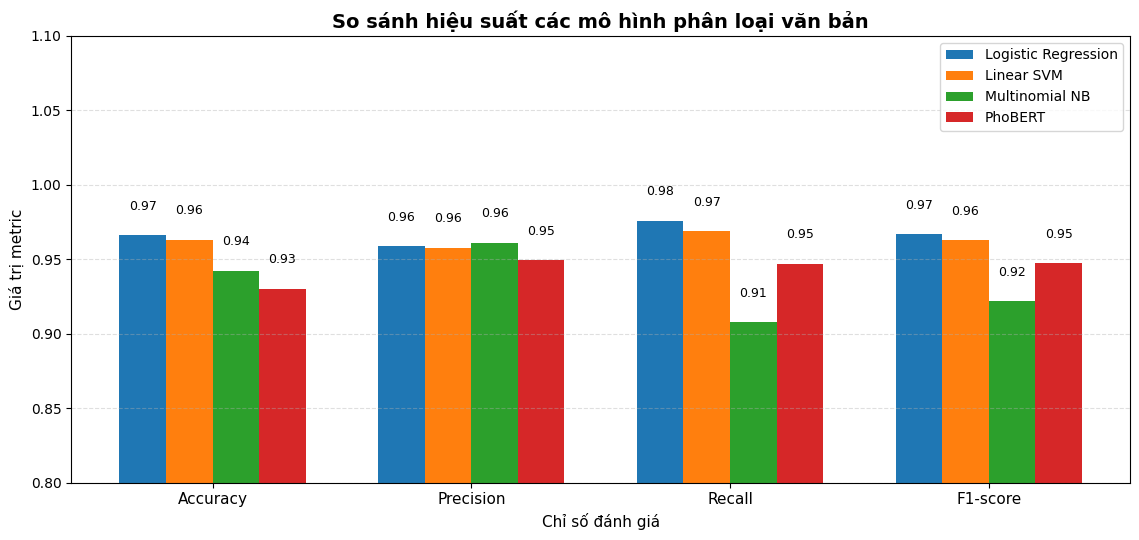

In [58]:
import numpy as np
import matplotlib.pyplot as plt

#Data
models = ["Logistic Regression", "Linear SVM", "Multinomial NB", "PhoBERT"]
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

scores = np.array([
    [0.9663, 0.9590, 0.9759, 0.9670],  # Logistic
    [0.9631, 0.9577, 0.9688, 0.9629],  # SVM
    [0.9423, 0.9611, 0.9076, 0.9220],  # MultinomialNB
    [0.9303, 0.9494, 0.9471, 0.9476],  # PhoBERT
])

# Plot
x = np.arange(len(metrics))
width = 0.18

plt.figure(figsize=(11.5, 5.5))
ax = plt.gca()

for i, model in enumerate(models):
    bars = ax.bar(
        x + (i - 1.5) * width,
        scores[i],
        width,
        label=model
    )

    # Value labels
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.015,
            f"{bar.get_height():.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

# Style
ax.set_title(
    "So sánh hiệu suất các mô hình phân loại văn bản",
    fontsize=14,
    weight="bold"
)
ax.set_ylabel("Giá trị metric", fontsize=11)
ax.set_xlabel("Chỉ số đánh giá", fontsize=11)

ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)


ax.set_ylim(0.80, 1.10)

ax.grid(axis="y", linestyle="--", alpha=0.4)

# Legend góc trên phải
ax.legend(
    loc="upper right",
    frameon=True,
    fontsize=10
)

plt.tight_layout()
plt.show()